#### Predicting health insurance charge

`Approach`

- Identify the variable we want to predict

- Identity what type of data science problem this is

- Get the data, explore and transform

-  Split into training and testing sets

- Build several models using different algorithms on the training set

- Evaluate the performance of the models on the test set

- Select the best performing model


In [1]:
#import dependencies

import pandas as pd
import numpy as np
# from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sb

C:\Users\aaginam\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [1]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('insurance.csv')

In [ ]:
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

### EDA - Exploratory Data Analysis

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


From the data we have, it is clear that this is a regression problem because charges is a continuous numerical variable. The algorithms we can try out include

- Simple/ Multi-linear regression

- Decision Tree regression

- Random Forest regression

- SVM (Support Vector Machines)

In [5]:
df.shape

(1338, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We have 6 possible inputs/features. Let's begin by renaming children to No of children.

In [15]:
df.rename(columns ={'children': 'no of children'}, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   object 
 2   bmi             1338 non-null   float64
 3   no of children  1338 non-null   int64  
 4   smoker          1338 non-null   object 
 5   region          1338 non-null   object 
 6   charges         1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [17]:
## More EDA

df.describe()

,age,bmi,no of children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


`Interesting Stats`

- The variance in the age column is high compared to the rest
- The data covers people between the ages of 18 and 64 

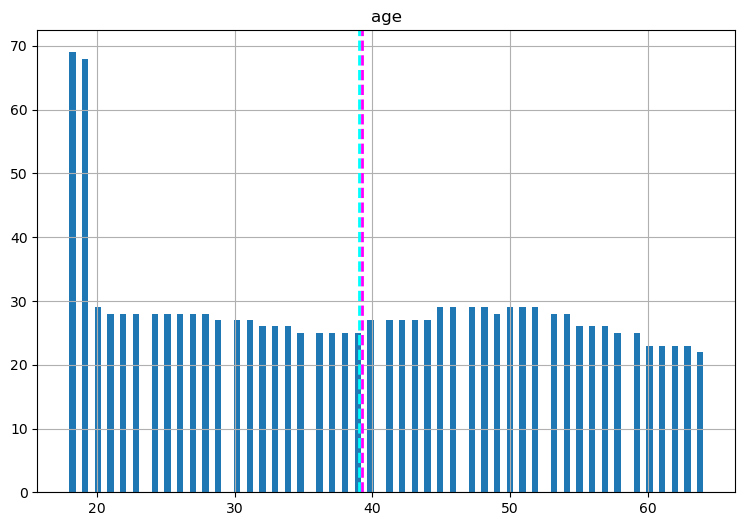

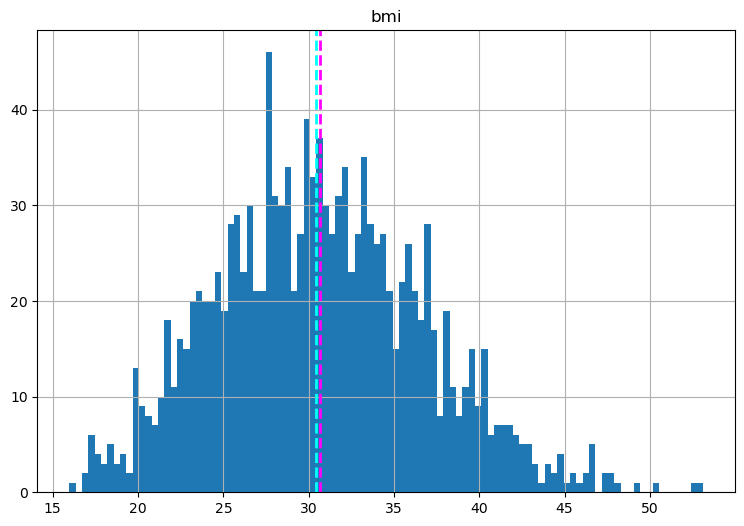

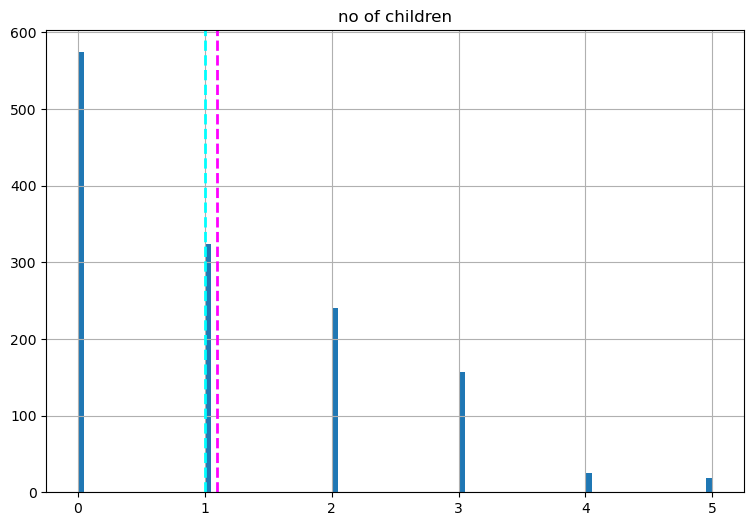

In [19]:
%matplotlib inline

numeric_features = ['age', 'bmi', 'no of children']

# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

`Observation`

children column is discreete, bmi is normal and age is uniform

C:\Users\aaginam\AppData\Local\Temp\ipykernel_6340\2602956300.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


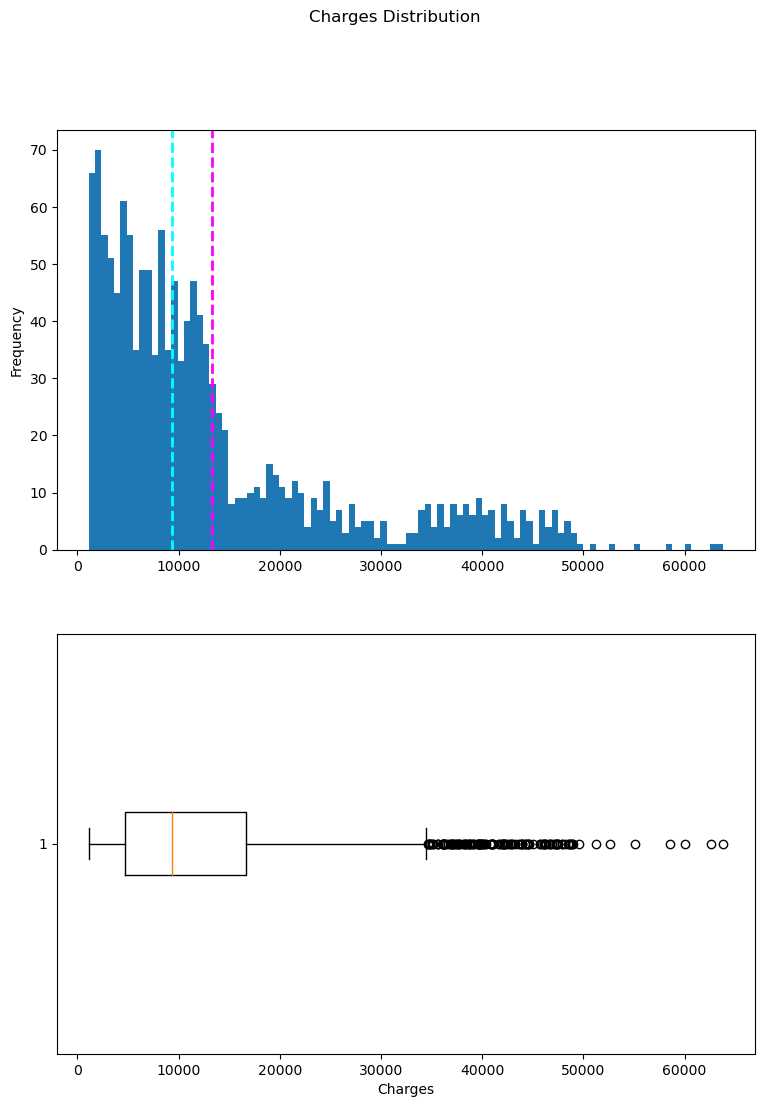

In [21]:
## Visualize the label's data distribution

# Get the label column
label = df['charges']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Charges')

# Add a title to the Figure
fig.suptitle('Charges Distribution')

# Show the figure
fig.show()


#### There are a lot of outliers in the label. Most of the values are the lower end between 5k to 15k 

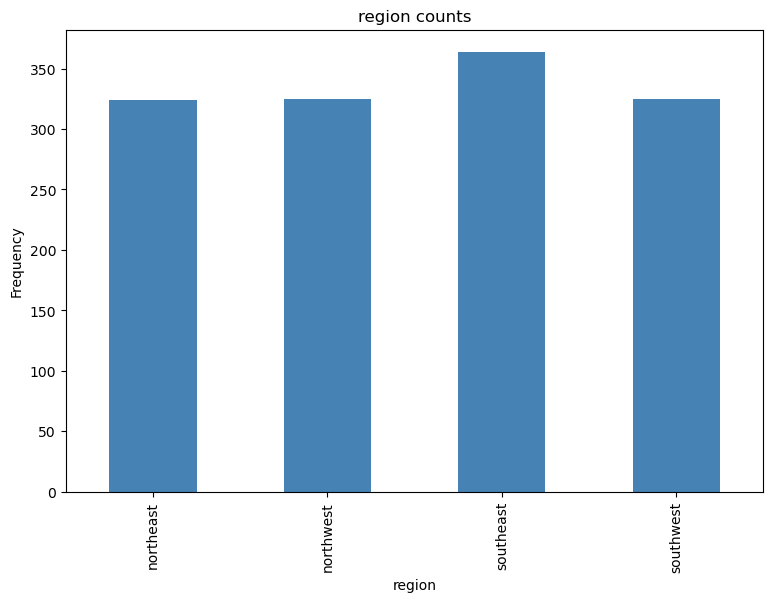

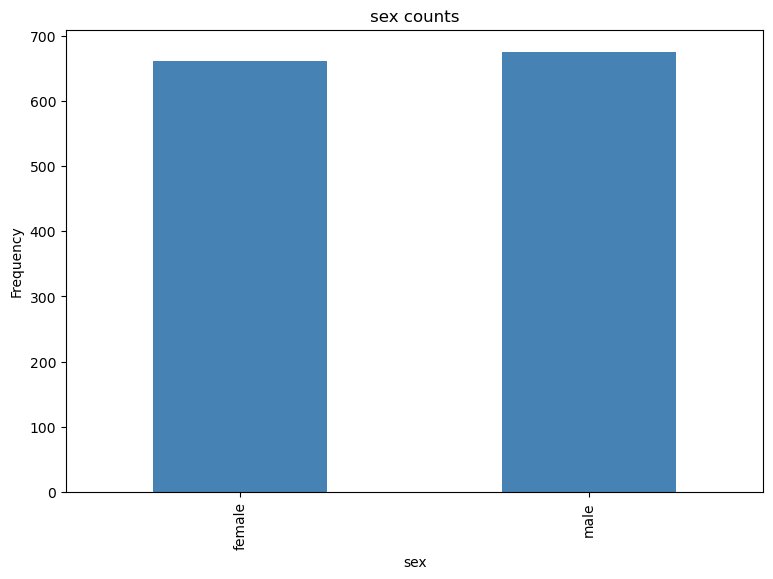

In [22]:

import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['region', 'sex']

for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

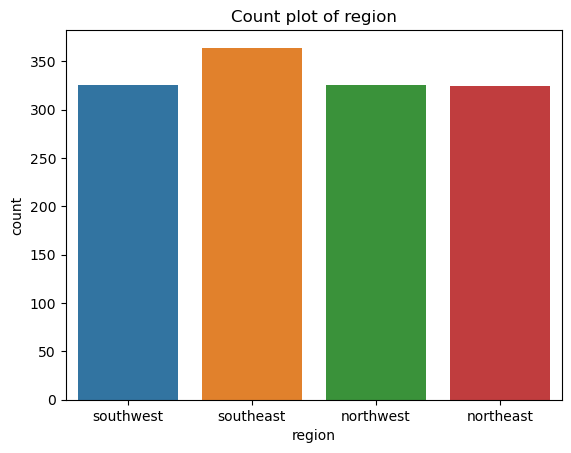

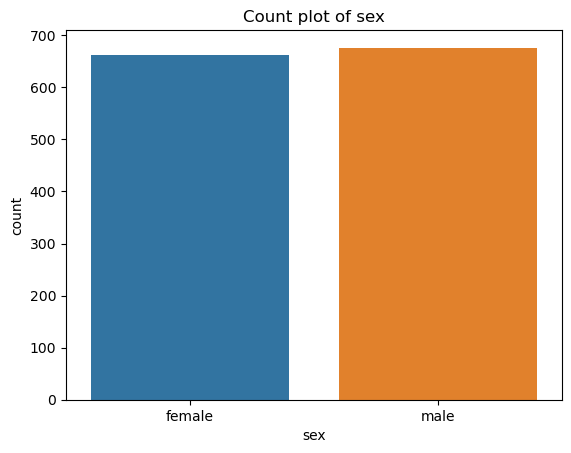

In [25]:
for col in categorical_features:
    sb.countplot(x=col, data=df)
    plt.title(f'Count plot of {col}')
    plt.show()

There is more or less uniform distribution in the columns 


### Now let's check if there's a relationship between the features and label

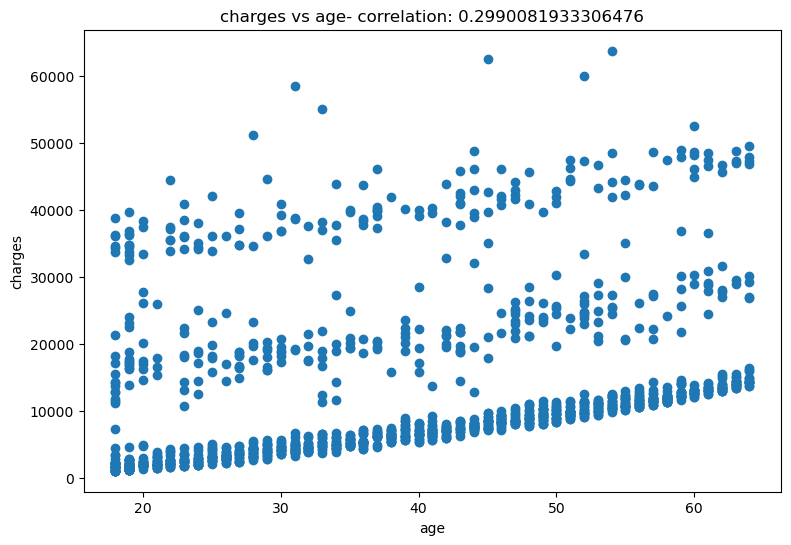

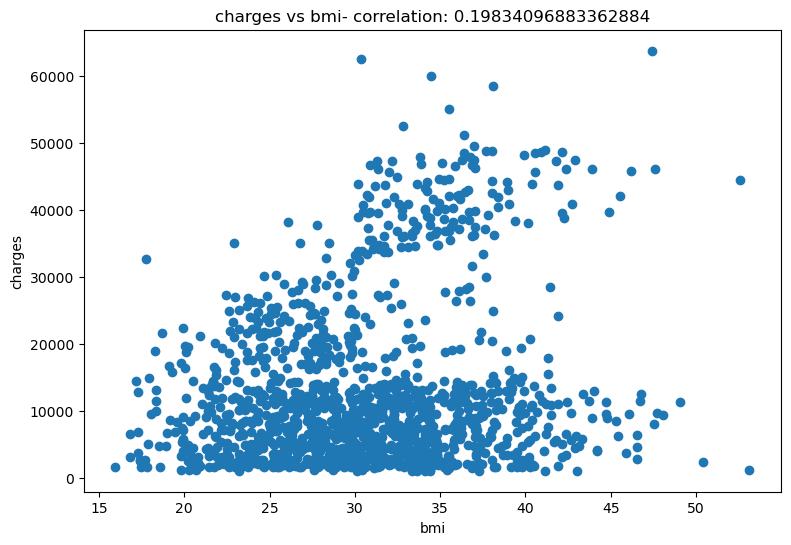

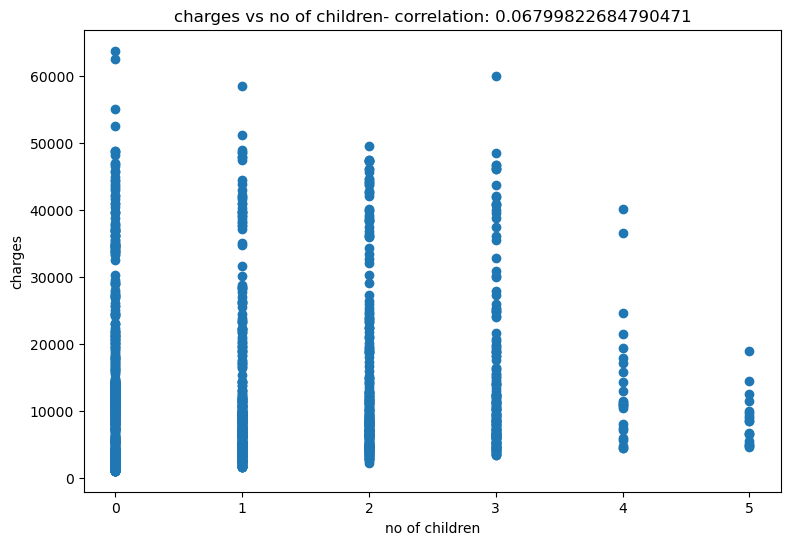

In [26]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['charges']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('charges')
    ax.set_title('charges vs ' + col + '- correlation: ' + str(correlation))
plt.show()

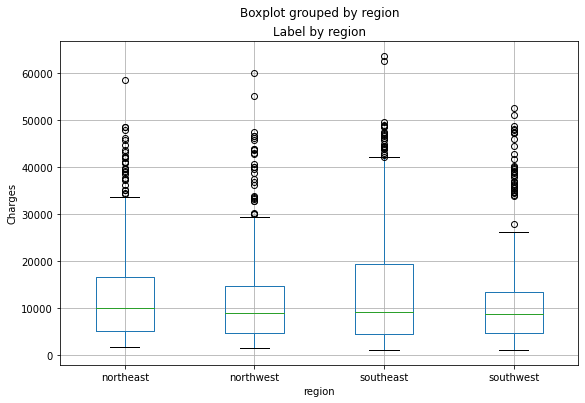

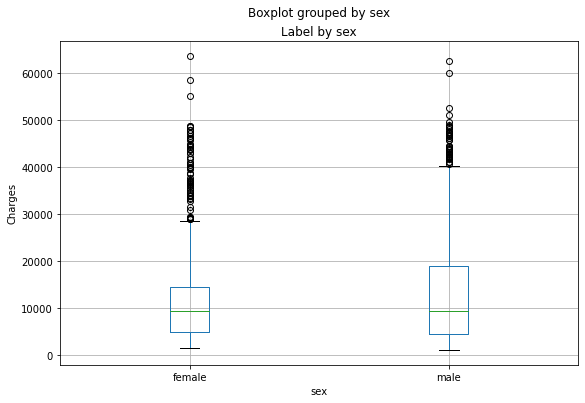

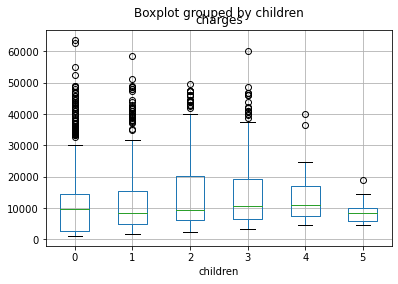

In [19]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'charges', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Charges")
plt.show()


df.boxplot(column='charges', by='children')
plt.show()

In [33]:
## Data cleaning

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [34]:
df.duplicated().sum()

1

In [36]:
df.drop_duplicates(inplace=True)

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


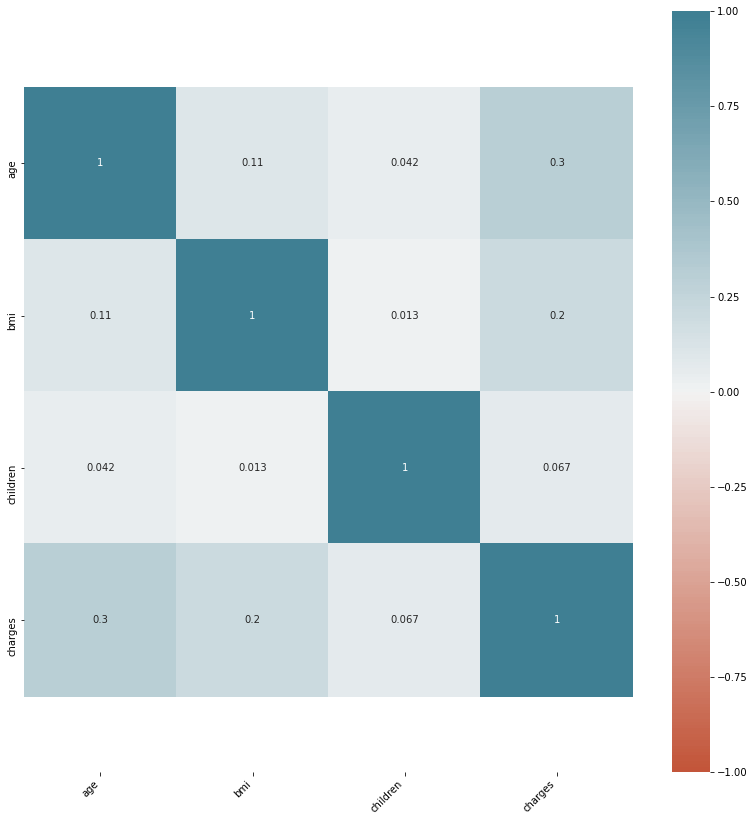

In [38]:
# Correlation of the features
import seaborn as sns
corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

corr

There is a variation for charges vs sex and charges vs region

## Feature Selection

In [29]:
X = df.drop('charges', axis=1)
y = df.loc[:, 'charges']

In [30]:
from sklearn.feature_selection import SelectKBest, chi2

X['sex'] = X['sex'].replace(
{
    'female' : 0,
    'male': 1
})

X['region'] = X['region'].replace({
    'northeast' : 0,
    'northwest' : 1,
    'southeast' : 2,
    'southwest' : 3
})

X['smoker'] = X['smoker'].replace({
    'yes' : 0,
    'no' : 1
})

C:\Users\aaginam\AppData\Local\Temp\ipykernel_6340\3215652581.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['sex'] = X['sex'].replace(
C:\Users\aaginam\AppData\Local\Temp\ipykernel_6340\3215652581.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['region'] = X['region'].replace({
C:\Users\aaginam\AppData\Local\Temp\ipykernel_6340\3215652581.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy

In [31]:
X.head()

,age,sex,bmi,no of children,smoker,region
0,19,0,27.900,0,0,3
1,18,1,33.770,1,1,2
2,28,1,33.000,3,1,2
3,33,1,22.705,0,1,1
4,32,1,28.880,0,1,1


In [32]:
from import StandardScaler 

scaled_X = StandardScaler(X)

SyntaxError: invalid syntax (816968644.py, line 1)

In [33]:
X_new = SelectKBest(k=4).fit_transform(X, y)

X_new

C:\Users\aaginam\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


array([[27.9 ,  0.  ,  0.  ,  3.  ],
       [33.77,  1.  ,  1.  ,  2.  ],
       [33.  ,  3.  ,  1.  ,  2.  ],
       ...,
       [36.85,  0.  ,  1.  ,  2.  ],
       [25.8 ,  0.  ,  1.  ,  3.  ],
       [29.07,  0.  ,  0.  ,  1.  ]])

In [34]:
## Split the dataset 

from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.30, random_state=0)

In [35]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [36]:
## Evaluate the trained model

from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 46979200.800464
RMSE: 6854.13749500723
R2: 0.7054031581019172


In [37]:
## check if there's an overfitting

r2_score(y_train, model.predict(X_train))

0.6412280556718757

Text(0.5, 1.0, 'Daily Bike Share Predictions')

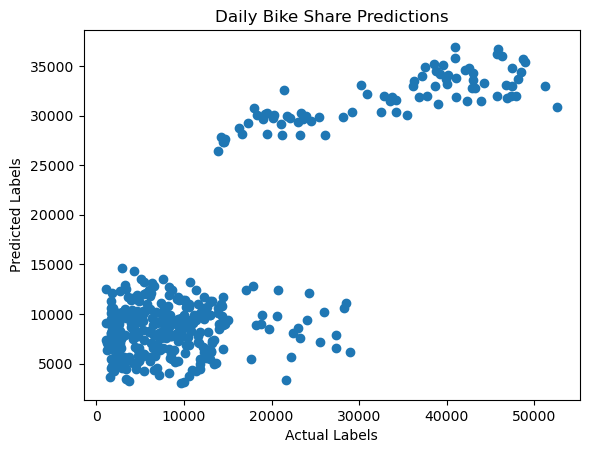

In [38]:
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# z = np.polyfit(y_test, predictions, 1)
# p = np.poly1d(z)
# plt.plot(y_test,p(y_test), color='magenta')
# plt.show()

## Decision Tree

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X, y)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_4 <= 0.50
|   |--- feature_2 <= 30.01
|   |   |--- feature_0 <= 41.00
|   |   |   |--- feature_0 <= 29.50
|   |   |   |   |--- feature_2 <= 28.49
|   |   |   |   |   |--- feature_2 <= 21.73
|   |   |   |   |   |   |--- feature_3 <= 2.50
|   |   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 21.09
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 26.50
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 18.86
|   |   |   |   |   |   |   |   |   |   |   |--- value: [14455.64]
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  18.86
|   |   |   |   |   |   |   |   |   |   |   |--- value: [14571.89]
|   |   |   |   |   |   |   |   |   |--- feature_0 >  26.50
|   |   |   |   |   |   |   |   |   |   |--- value: [15006.58]
|   |   |   |   |   |   |   |   |--- feature_2 >  21.09
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- value: [1428

In [90]:
X_train

array([[28.215,  0.   ,  1.   ,  0.   ],
       [32.8  ,  0.   ,  1.   ,  3.   ],
       [46.75 ,  5.   ,  1.   ,  2.   ],
       ...,
       [25.08 ,  0.   ,  1.   ,  2.   ],
       [35.53 ,  0.   ,  1.   ,  1.   ],
       [18.5  ,  1.   ,  1.   ,  3.   ]])

In [96]:
type(X.columns)

pandas.core.indexes.base.Index

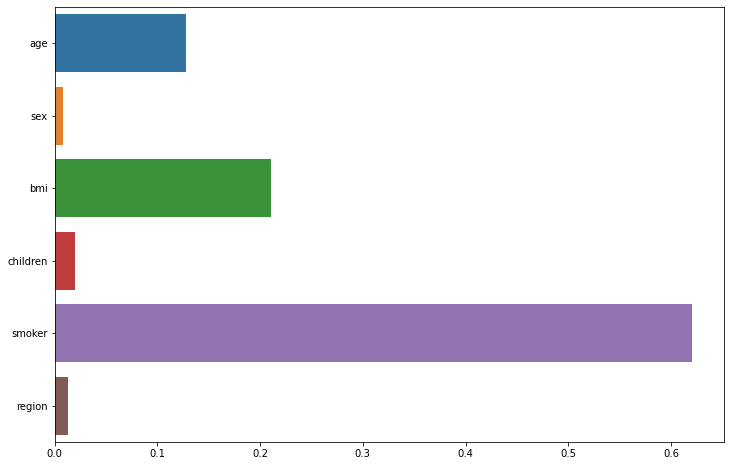

In [98]:
# feature importance

plt.figure(figsize=(12,8))

importance = model.feature_importances_

sb.barplot(x=importance, y=X.columns)
plt.show()

MSE: 62759940.83704223
RMSE: 7922.117194099203
R2: 0.6064454044922674


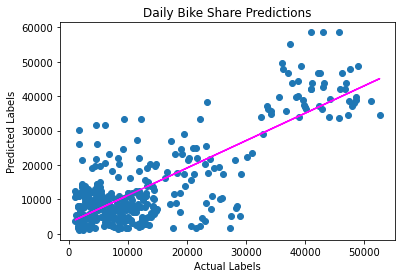

In [66]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

RandomForestRegressor() 

MSE: 40963279.03734725
RMSE: 6400.256169665965
R2: 0.743127757974264


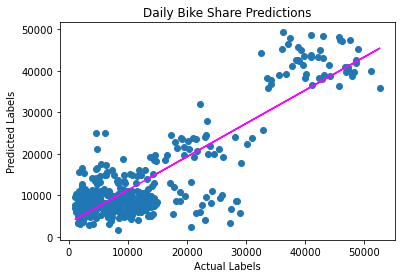

In [67]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)


# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [71]:
## polynomial regression 

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_new)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=0)

poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)



LinearRegression()

In [81]:
# Evaluate the model using the test data
predictions = poly_reg.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

#Plot predicted vs actual
# plt.scatter(y_test, predictions)
# plt.xlabel('Actual Labels')
# plt.ylabel('Predicted Labels')
# #plt.title('Charges ')
# # overlay the regression line
# z = np.polyfit(y_test, predictions, 1)
# p = np.poly1d(z)
# plt.plot(y_test,poly_reg.predict(X_test), color='magenta')
# plt.show()

MSE: 33792469.146857545
RMSE: 5813.129032359212
R2: 0.7880944221915264


## Model persistence

In [82]:
from joblib import dump, load

dump(poly_reg, 'model_poly.joblib') 

['model_poly.joblib']